In [2]:
import os
from pathlib import Path
import numpy as np 
from PIL import Image
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

print(np.__version__)
print(cv2.__version__)

1.20.3
4.6.0


## 1. Write a MATLAB script to identify the contour of the maple leaf in image ‘Maple.jpg’.  
 
   <img src="Maple.jpg" height="400">  

   - The program should be able to exclude the petiole from the contour.  
   - Draw the contour on top of the maple leaf in the image.   
   - Please also calculate the ratio of leaf contour and leaf area.


### load img

shape of img (607, 460)


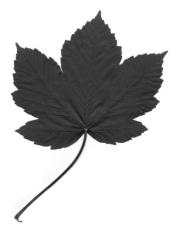

In [126]:
# load img as grayscal
img = cv2.imread('Maple.jpg', cv2.IMREAD_GRAYSCALE)   
print('shape of img', img.shape) # (h, w)
plt.imshow(img, cmap='gray')
plt.axis('off');

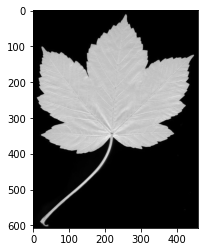

In [127]:
# convert black(0) <-> white(255) 
img = 255-img
plt.imshow(img, cmap='gray')

Set threshold between "50-100"


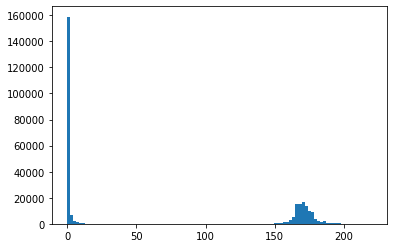

In [129]:
# check value distribution 
plt.hist(img.reshape(-1), bins=100);

print(f'Set threshold between "50-100"' )

#### Exclude the petiole from the contour 


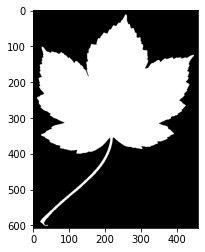

In [145]:
# convert to binary (0, 255)
thresh = 100
_, img = cv2.threshold(img, thresh, 255,0)
plt.imshow(img, cmap='gray')

##### Removal of leaf stalks by dilate and erosion


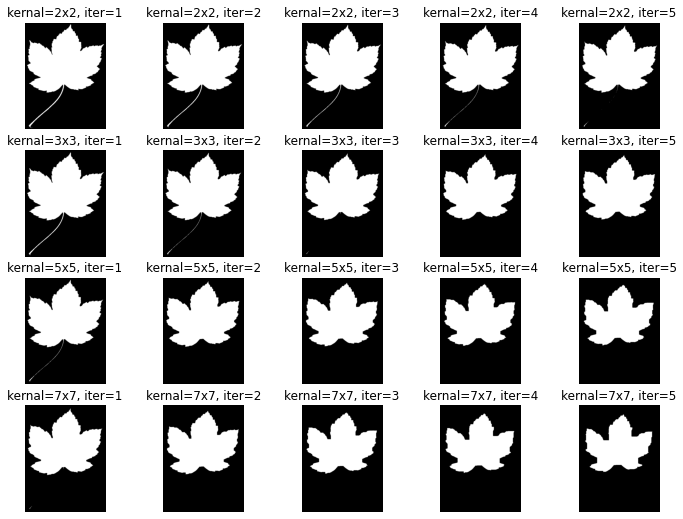

In [146]:

# try parameters
ksizes = [2, 3, 5, 7] 
iterations =  [1, 2, 3, 4, 5]

titles = [] 
imgs =[]

for k in ksizes:
    titles_k = []
    imgs_k = []
    for i in iterations:
        kernel_  = cv2.getStructuringElement(cv2.MORPH_RECT,(k, k))
        img_erode_ = cv2.erode(img, kernel_,iterations=i)
        imgs_k.append(img_erode_)
        
        title_ = f'kernal={k}x{k}, iter={i}'
        titles_k.append(title_)
        
    titles.append(titles_k)
    imgs.append(imgs_k)

fig, axs = plt.subplots(len(ksizes), len(iterations), figsize=(12,9))
for k, rows in enumerate(axs):
    for i, ax in enumerate(rows):
        ax.set_title(titles[k][i])
        ax.imshow(imgs[k][i], cmap='gray')
        ax.axis('off')
        


Best parameters : kernal=3x3, iterations=4


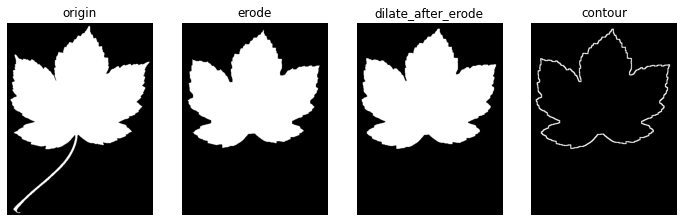

In [207]:
k=3 ; i=4
print(f'Best parameters : kernal={k}x{k}, iterations={i}')
kernel_  = cv2.getStructuringElement(cv2.MORPH_RECT,(k, k))
img_erode = cv2.erode(img, kernel_,iterations=i)

# get contour by img_dilate - img_erode
k=3 ; i=3
kernel_  = cv2.getStructuringElement(cv2.MORPH_RECT,(k, k))
img_dilate = cv2.dilate(img_erode, kernel_, iterations=i)
img_contour = img_dilate - img_erode


titles = ['origin', 'erode', 'dilate_after_erode', 'contour']
imgs = [img, img_erode, img_dilate, img_contour]
fig, axs = plt.subplots(1, len(imgs), figsize=(12, 8))
for i, ax in enumerate(axs):
    ax.imshow(imgs[i], cmap='gray')
    ax.set_title(titles[i])
    ax.axis('off')


#### Draw the contour on top of the maple leaf in the image.  

(607, 460)
(607, 460, 3)


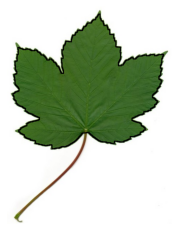

In [266]:
img_bgr = cv2.imread('Maple.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) 
img_contour_rgb = cv2.cvtColor(img_contour, cv2.COLOR_GRAY2BGR)
print(img_contour.shape)
print(img_contour_rgb.shape )

img_ = img_contour_rgb*img_rgb + img_rgb
plt.imshow(img_)
# plt.imshow(cv2.drawContours(img_rgb, img_contour_rgb, -1, (0,255,0), 3) )
plt.axis('off');

#### Calculate the ratio of leaf contour and leaf area.

In [209]:
area_pic = img.size
print(f'area_pic : {area_pic:,.0f}')

area_contour = np.sum(img_contour/255)
print(f'area_contour : {area_contour:,.0f}')
area_leaf =  np.sum(img/255)
print(f'area_leaf : {area_leaf:,.0f}\n')

print(f'Ratio of leaf contour : {area_contour/area_pic:.2f}')
print(f'Ratio of leaf area : {area_leaf/area_pic:.2f}')

area_pic : 279,220
area_contour : 6,642
area_leaf : 106,127

Ratio of leaf contour : 0.02
Ratio of leaf area : 0.38


---

## 2. Calculate the mean area of 1 NTD, 5 NTD, 10 NTD and 50 NTD coins in image  ‘NTDcoins.jpg’. 

<img src="NTDcoins.jpg" width="600">  

- Demonstrate the coins in a labeled image, where 
    - black pixels represent background, red pixels represent 1 NTD coins, 
    - yellow pixels represent 5  NTD coins, 
    - green pixels represent 10 NTD coins, and 
    - blue pixels represent 50 NTD coins. 
- Describe your image processing procedure and approach.

shape of img (600, 1600, 3)


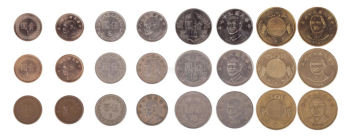

In [3]:
# load img as grayscal
img_bgr = cv2.imread('NTDcoins.jpg' )  #　channel : B,G,R 
print('shape of img', img_bgr.shape) # (h, w，c)

# convert bgr2rgb 
img_rgb = cv2.cvtColor(img_bgr , cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off');

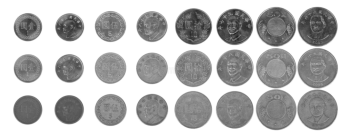

In [8]:
# load as grayscale
img_gray =  cv2.imread('NTDcoins.jpg' , cv2.IMREAD_GRAYSCALE) 
plt.imshow(img_gray, cmap='gray')
plt.axis('off');

Set threshold between "200"


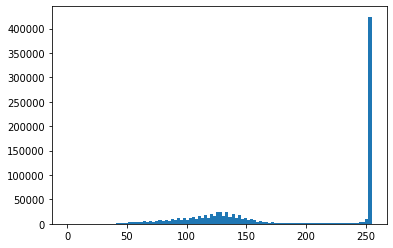

In [5]:
# check value distribution 
plt.hist(img_gray.reshape(-1), bins=100);

print(f'Set threshold at "200-230"' )

#### Exclude the petiole from the contour 


(600, 1600)


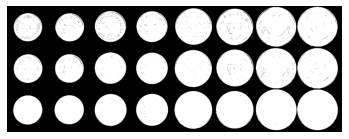

In [25]:
# convert to binary (0, 255)
thresh = 220
_, img_bi = cv2.threshold(img_gray, thresh, 255,0)
img_bi = 255-img_bi 
print(img_bi.shape)
plt.imshow(img_bi, cmap='gray')
plt.axis('off');

#### denoise by erosion followed by dilation with 'cv2.morphologyEx'
['cv2.morphologyEx'](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html)
- closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    - Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

[How to remove noise in image OpenCV, Python?](https://stackoverflow.com/questions/62042172/how-to-remove-noise-in-image-opencv-python)  
[cv2.getStructuringElement()](https://blog.csdn.net/u012193416/article/details/79312972
- kernel選擇
    - 矩形：MORPH_RECT;
    - 十字：MORPH_CROSS;
    - 橢圓形：MORPH_ELLIPSE;

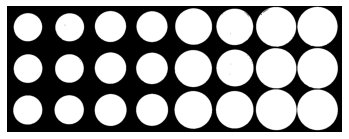

In [26]:
# # blur
# blur = cv2.GaussianBlur(img_bi, (0,0), sigmaX=33, sigmaY=33)

# # divide
# divide = cv2.divide(img_bi, blur, scale=255)

# # otsu threshold
# thresh = cv2.threshold(divide, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# apply morphology
# select StructuringElement for cicle
k=3; i=1
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (k,k))
# morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
morph = cv2.morphologyEx(img_bi, cv2.MORPH_CLOSE, kernel, iterations=i)

plt.imshow(morph, cmap='gray')
plt.axis('off');


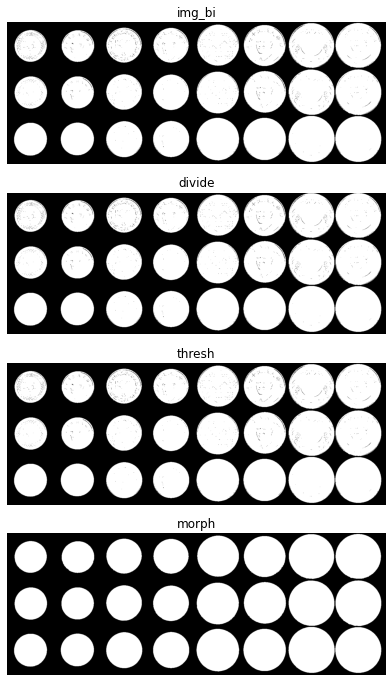

In [9]:
# titles = ['img_bi', "divide", "thresh", "morph"]
# imgs = [img_bi, divide, thresh, morph]
# fig, axs = plt.subplots(len(imgs), 1, figsize=(12, 12))
# for i, ax in enumerate(axs):
#     ax.imshow(imgs[i], cmap='gray')
#     ax.set_title(titles[i])
#     ax.axis('off')


#### Label the closed(bright) area
[cv2.connectedComponentsWithStats](https://blog.csdn.net/qq_40784418/article/details/106023288)

In [46]:
 # apply connected component analysis to the thresholded image

connectivity = 4  # 4 or 8 connectivity type
numLabels, labels, stats, centroids = cv2.connectedComponentsWithStats(morph, connectivity, cv2.CV_32S)

print('numLabels : ', numLabels)      # label 0 as whole img. sort by area descending 
print('labels.shape : ', labels.shape)   # label per pixel
print('stats.shape : ', stats.shape)     # x, y, w, h, area
print('centroids.shape : ', centroids.shape)

areas = stats[...,-1]
print('areas : ', areas) 

num_coins = 3*8
assert (numLabels-1) == num_coins, f'Number of labels({numLabels-1}) is not match with number of coins(num_coins).'

numLabels :  25
labels.shape :  (600, 1600)
stats.shape :  (25, 5)
centroids.shape :  (25, 2)
areas :  [445428  28265  28458  23853  23702  17152  16967  14224  14365  29053
  29170  24330  24477  17540  17662  14638  14588  29693  29472  25230
  25063  18126  18244  15178  15122]


##### assign colors by area

In [ ]:
coin_1, coin_5, coin_10, coin_50  = np.sort(areas[1:])[5::6] # max of coin 1, 5, 10, 50

In [ ]:
# assign colors
black = (0,0,0)
b = (0,0,255)
y = (255,255,0)
g = (0,255,0)
r = (255,0,0)

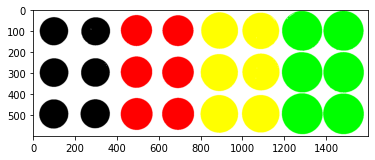

In [93]:

output = np.ones((morph.shape[0], morph.shape[1], 3),  np.uint8)*255 # shape (600, 1600, 3)

for l_, area in zip(range(numLabels), areas):
    if l_==0:
        continue
    mask = labels == l_
    if area <=  coin_1:
        output[mask] = black
    elif (area > coin_1) and (area <=  coin_5):
        output[mask] = r
    elif (area > coin_5) and (area <=  coin_10):
         output[mask] = y
    elif (area > coin_10) and (area <=  coin_50):
         output[mask] = g

plt.imshow(output);

##### assign colors by clustering

In [115]:
kmeans.labels_
from sklearn.cluster import KMeans
w_h_a =  stats[:,2:]              # slice w, h, area
# w_h_a = np.sort(w_h_a, axis=0)    # sort by first value of rows
kmeans = KMeans(n_clusters=5, random_state=0).fit(w_h_a)
c_label = kmeans.labels_
# for i, l_ in enumerate(kmeans.labels_) :
#     print(l_, w_h_a[i]) 
# print(, w_h_a)
# print()


In [120]:
w_h_a_l = np.concatenate([np.arange(25).reshape(-1,1), w_h_a,  c_label.reshape(-1,1)], axis=1)
# np.sort(w_h_a_l, axis=0) 
w_h_a_l  # label of connectedComponents, w, h, area, cluster_label 

array([[     0,   1600,    600, 445428,      1],
       [     1,    191,    189,  28265,      3],
       [     2,    192,    189,  28458,      3],
       [     3,    176,    174,  23853,      0],
       [     4,    176,    173,  23702,      0],
       [     5,    150,    148,  17152,      4],
       [     6,    149,    147,  16967,      4],
       [     7,    136,    134,  14224,      2],
       [     8,    137,    134,  14365,      2],
       [     9,    193,    191,  29053,      3],
       [    10,    193,    193,  29170,      3],
       [    11,    178,    176,  24330,      0],
       [    12,    178,    176,  24477,      0],
       [    13,    150,    150,  17540,      4],
       [    14,    151,    150,  17662,      4],
       [    15,    137,    136,  14638,      2],
       [    16,    137,    135,  14588,      2],
       [    17,    195,    194,  29693,      3],
       [    18,    194,    193,  29472,      3],
       [    19,    180,    180,  25230,      0],
       [    20,    1

In [124]:
c_labels = [2, 4, 0, 3] 
coins = ['coin_1', 'coin_5', 'coin_10', 'coin_50']
label2coin = dict(zip(c_labels, coins))
print(label2coin)
label2coin[2]

{2: 'coin_1', 4: 'coin_5', 0: 'coin_10', 3: 'coin_50'}


'coin_1'

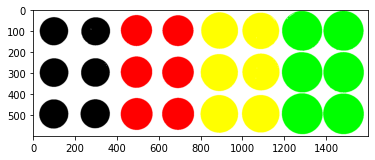

In [134]:

output = np.ones((morph.shape[0], morph.shape[1], 3),  np.uint8)*255 # shape (600, 1600, 3)

for l_ in  range(1, numLabels) :
    mask = labels == l_     # label of connectedComponents
    c_l_ = w_h_a_l[l_, -1]  # slice cluster_label 
    c_ = label2coin[c_l_]   # map cluster_label  to 'coin' class
    if c_ ==  'coin_1':
        output[mask] = black
    elif c_ ==  'coin_5':
        output[mask] = r
    elif c_ ==  'coin_10':
         output[mask] = y
    elif c_ ==  'coin_50':
         output[mask] = g

plt.imshow(output);